# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [135]:
# read the iris data into a pandas DataFrame, including column names
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [73]:
# gather basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Task 3

In [50]:
# use groupby to look for differences between the species
sepl_mean = df.groupby('species').sepal_length.mean()
sepw_mean = df.groupby('species').sepal_width.mean()
petl_mean = df.groupby('species').petal_length.mean()
petw_mean = df.groupby('species').petal_width.mean()
space = '\n' + '---------------------------------------' + '\n'
print(sepl_mean, space, sepw_mean, space, petl_mean, space, petw_mean)

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64 
---------------------------------------
 species
setosa        3.418
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64 
---------------------------------------
 species
setosa        1.464
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64 
---------------------------------------
 species
setosa        0.244
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


In [57]:
# use sorting to look for differences between the species
print(sepl_mean.sort_values(),space, sepw_mean.sort_values(), space, petl_mean.sort_values(), space, petw_mean.sort_values())


species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64 
---------------------------------------
 species
versicolor    2.770
virginica     2.974
setosa        3.418
Name: sepal_width, dtype: float64 
---------------------------------------
 species
setosa        1.464
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64 
---------------------------------------
 species
setosa        0.244
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


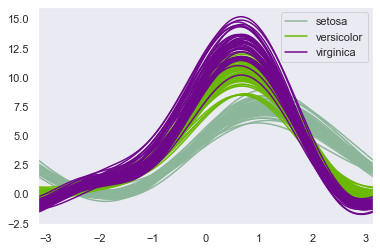

In [87]:
# use plotting to look for differences between the species
pd.plotting.andrews_curves(df,"species");


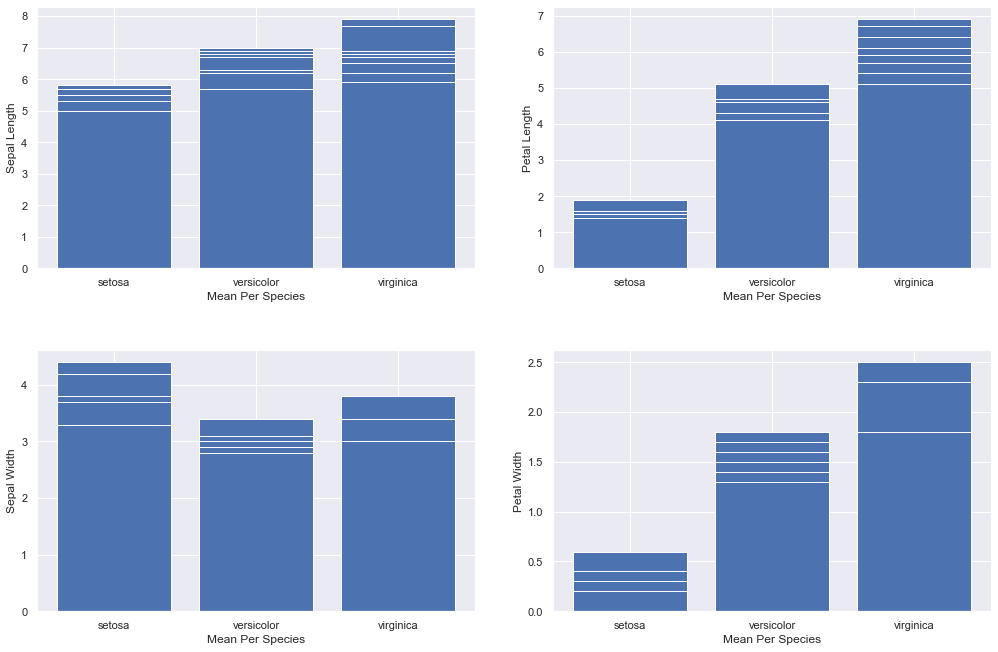

In [100]:
# use plotting to look for differences between the species

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.bar(df['species'], df['sepal_length']);
plt.tight_layout(pad= 4)
plt.xlabel('Mean Per Species');
plt.ylabel('Sepal Length');

plt.subplot(2, 2, 2)
plt.bar(df['species'], df['petal_length']);
plt.tight_layout(pad= 4)
plt.xlabel('Mean Per Species');
plt.ylabel('Petal Length');

plt.subplot(2, 2, 3)
plt.bar(df['species'], df['sepal_width']);
plt.tight_layout(pad= 4)
plt.xlabel('Mean Per Species');
plt.ylabel('Sepal Width');

plt.subplot(2, 2, 4)
plt.bar(df['species'], df['petal_width']);
plt.xlabel('Mean Per Species');
plt.ylabel('Petal Width');

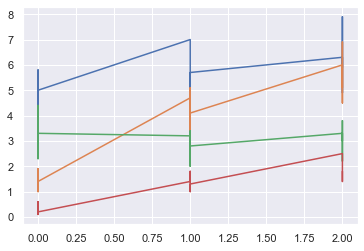

In [128]:
# map species to a numeric value so that plots can be colored by category
s = df.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
s2 = df[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']]
plt.figure()
plt.plot(s, s2);

## Task 4

In [138]:
# Come up with a set of rules that could be used to predict species based upon measurements.
sepal_length = float(input('What is its sepal length? '))
sepal_width = float(input('What is its sepal width? '))
petal_length = float(input('What is its petal length? '))
petal_width = float(input('What is its petal width? '))

if (( 4.3 <= sepal_length <= 5.8) and ( 2.3 <= sepal_width <= 4.4) and ( 1.0 <= petal_length <= 1.9) and ( 0.1 <= petal_width <= 0.6)):
    print('This is a setosa.')
    
elif (( 4.9 <= sepal_length <= 7.0) and ( 2.0 <= sepal_width <= 3.4) and ( 3.0 <= petal_length <= 5.1) and ( 1.0 <= petal_width <= 1.8)):
    print('This is a versicolor.')
    
elif (( 4.9 <= sepal_length <= 7.9) and ( 2.2 <= sepal_width <= 3.8) and ( 4.5 <= petal_length <= 6.9) and ( 1.4 <= petal_width <= 2.5)):
    print('This is a virginica.')
    
else:
    print("Sorry we didn't reach.")


What is its sepal length? 4.8
What is its sepal width? 3.0
What is its petal length? 1.5
What is its petal width? 0.3
This is a setosa.


In [137]:
grp1=df.groupby("species").agg({"sepal_length": ["mean", "min", "max"], "sepal_width": ["mean", "min", "max"], "petal_length": ["mean", "min", "max"],"petal_width": ["mean", "min", "max"]})
grp1

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.418  2.3  4.4        1.464  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.244  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

## Bonus

In [ ]:
# define function that accepts a row of data and returns a predicted species
